In [17]:
import pandas as pd 
import matplotlib.pyplot as plt

file_path = r'C:\Users\cirog\Desktop\Datasheet\Stock\eurusd_hour.csv'
data = pd.read_csv(file_path)

In [18]:
data['Datetime'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data.set_index('Datetime', inplace=True)

In [19]:
data.drop(['Date', 'Time'], axis = 1, inplace = True)

print(data.describe())

                 BO            BH            BL            BC           BCh  \
count  93084.000000  93084.000000  93084.000000  93084.000000  9.308400e+04   
mean       1.265734      1.266755      1.264736      1.265733 -8.928495e-07   
std        0.126894      0.127060      0.126722      0.126892  1.544143e-03   
min        1.035530      1.036970      1.033950      1.035550 -2.505000e-02   
25%        1.139878      1.140728      1.139130      1.139880 -6.000000e-04   
50%        1.274100      1.275315      1.272955      1.274105  1.000000e-05   
75%        1.357615      1.358770      1.356533      1.357630  6.000000e-04   
max        1.601310      1.603840      1.599200      1.601390  3.022000e-02   

                 AO            AH            AL            AC           ACh  
count  93084.000000  93084.000000  93084.000000  93084.000000  93084.000000  
mean       1.265900      1.266917      1.264897      1.265899     -0.000001  
std        0.126891      0.127053      0.126715      0

In [20]:
correlation = data[['BC', 'AC']].corr()
print("Correlazione tra Bid Close e Ask Close")
print(correlation)

Correlazione tra Bid Close e Ask Close
          BC        AC
BC  1.000000  0.999999
AC  0.999999  1.000000


In [21]:
import seaborn as sns

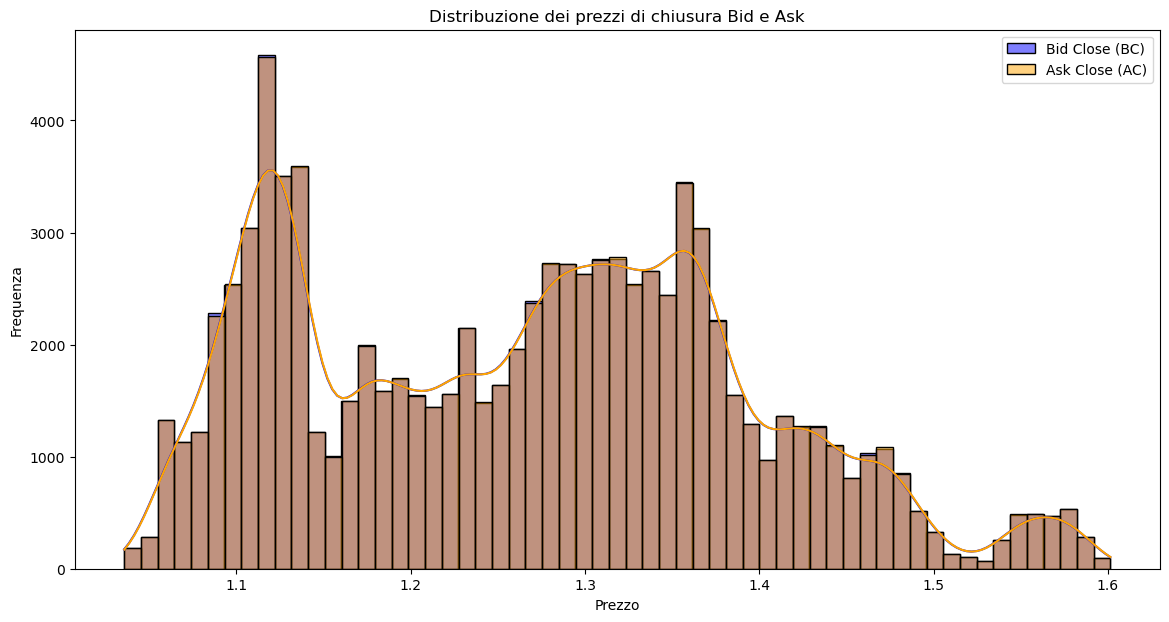

In [22]:
plt.figure(figsize=(14, 7))
sns.histplot(data['BC'], kde=True, color='blue', label='Bid Close (BC)')
sns.histplot(data['AC'], kde=True, color='orange', label='Ask Close (AC)')
plt.title('Distribuzione dei prezzi di chiusura Bid e Ask')
plt.xlabel('Prezzo')
plt.ylabel('Frequenza')
plt.legend()
plt.show()

In [23]:
data['BC_24h_MA'] = data['BC'].rolling(window = 24).mean()
data['BC_24h_STD'] = data['BC'].rolling(window = 24).std()

In [24]:
data['Upper_BB'] = data['BC_24h_MA'] + (2 * data['BC_24h_STD'])
data['Lower_BB'] = data['BC_24h_MA'] - (2 * data['BC_24h_STD'])

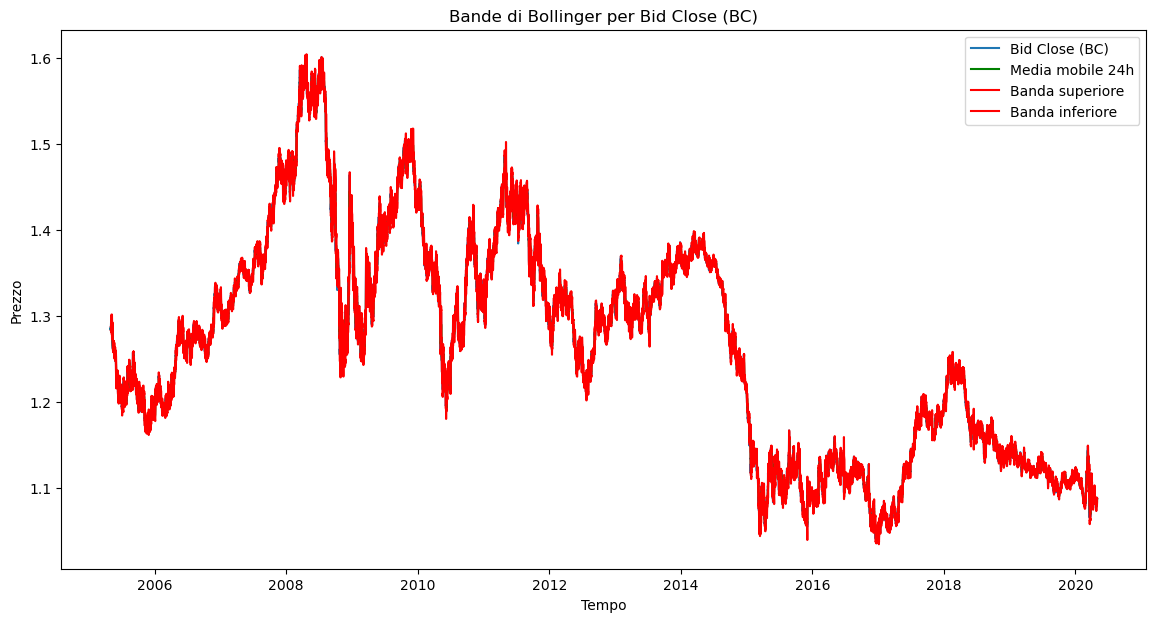

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['BC'], label='Bid Close (BC)')
plt.plot(data.index, data['BC_24h_MA'], label='Media mobile 24h', color='green')
plt.plot(data.index, data['Upper_BB'], label='Banda superiore', color='red')
plt.plot(data.index, data['Lower_BB'], label='Banda inferiore', color='red')
plt.fill_between(data.index, data['Lower_BB'], data['Upper_BB'], color='red', alpha=0.1)
plt.title('Bande di Bollinger per Bid Close (BC)')
plt.xlabel('Tempo')
plt.ylabel('Prezzo')
plt.legend()
plt.show()

In [26]:
if 'Volume' in data.columns:
    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data['Volume'], label='Volume')
    plt.title('Volume di trading nel tempo')
    plt.xlabel('Tempo')
    plt.ylabel('Volume')
    plt.legend()
    plt.show()
else:
    print("Colonna non trovata")
    

Colonna non trovata


In [27]:
from sklearn.cluster import KMeans

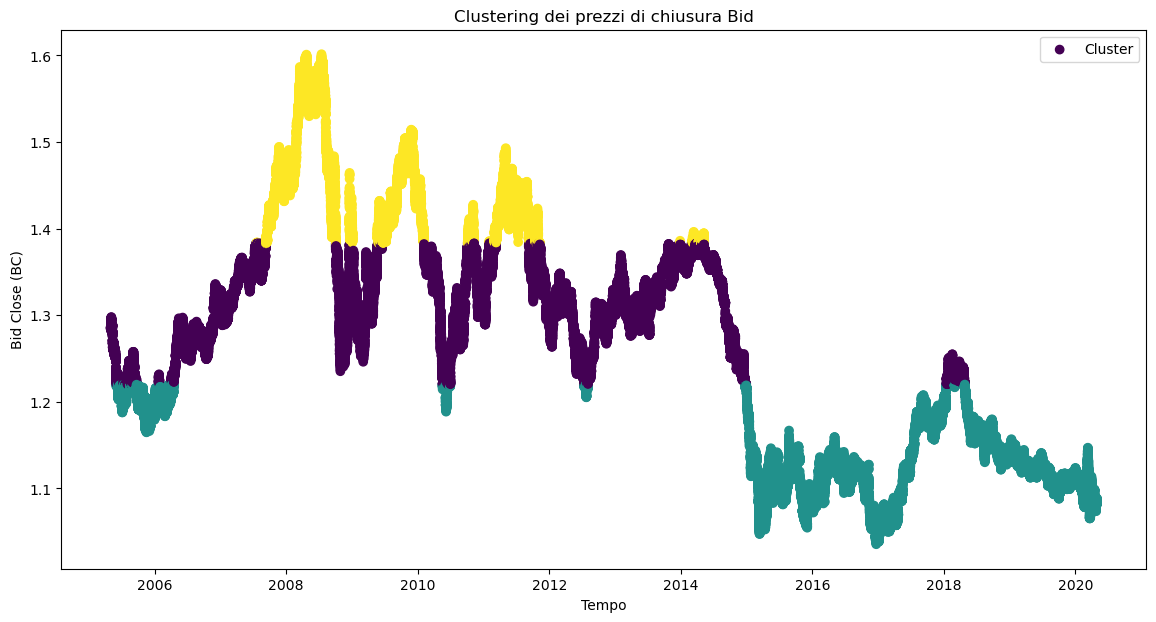

In [30]:
features = data[['BC', 'AC']].dropna()

kmeans = KMeans(n_clusters=3, n_init = 10)
data['Cluster'] = kmeans.fit_predict(features)

plt.figure(figsize=(14, 7))
plt.scatter(data.index, data['BC'], c=data['Cluster'], cmap='viridis', label='Cluster')
plt.title('Clustering dei prezzi di chiusura Bid')
plt.xlabel('Tempo')
plt.ylabel('Bid Close (BC)')
plt.legend()
plt.show()